In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [32]:
df = pd.read_csv('2018.csv', header = None, error_bad_lines=False, skiprows=5, skipfooter=28)

<ipython-input-32-8ea219a7f464>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('2018.csv', header = None, error_bad_lines=False, skiprows=5, skipfooter=28)


In [33]:
df.tail()

,0,1,2,3,4,5,6
22,NaN,NaN,Education,2757100,73300,50700,124000
23,NaN,NaN,Human health and social work activities,4032400,131900,89400,221300
24,NaN,Other service activities,NaN,1941200,43300,38500,81800
25,NaN,Other service activities,"Arts, entertainment and recreation",993900,22600,20800,43400
26,NaN,NaN,Other industries,947300,20600,17800,38400


In [34]:
df.head()

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,United Kingdom,Wales,NaN,Wales
1,NaN,NaN,NaN,.,West Wales and the Valleys,East Wales,.
2,All industries,NaN,NaN,33143300,814300,637800,1452100
3,All industries,"Agriculture, forestry and fishing",NaN,402700,25000,16000,41100
4,NaN,Production,NaN,2907900,94500,71200,165700


In [42]:
df1 = df[6]
df1

0      Wales 
1           .
2     1452100
3       41100
4      165700
5        2000
6      143600
7        7800
8       12400
9      101800
10     347600
11     190600
12      50600
13     106400
14      31500
15      35500
16      25200
17     187100
18      89000
19      98100
20     434900
21      89600
22     124000
23     221300
24      81800
25      43400
26      38400
Name: 6, dtype: object

### Data Preprocessing

In [43]:

def list_files(filepath, filetype):
    paths = []
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if file.lower().endswith(filetype.lower()):
                paths.append(os.path.join(root, file))
    return(paths)

In [47]:
my_files_list = list_files('.', '.csv')  ## Calling function from root folder to load all the files

In [48]:
my_files_list

['./2017.csv',
 './2018.csv',
 './2011.csv',
 './2015.csv',
 './2013.csv',
 './2014.csv',
 './2016.csv',
 './2012.csv',
 './2009.csv',
 './2010.csv']

In [68]:
def load_files(files):
    wales = []
    for file in files:
        df = pd.read_csv(file, header = None, error_bad_lines=False, skiprows=5, skipfooter=28)
        df6 = df[6]
#         df= pd.concat()
        wales.append(df6)
    
    return wales
        


In [69]:
wales_list = load_files(my_files_list)

<ipython-input-68-9feb17804aff>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, header = None, error_bad_lines=False, skiprows=5, skipfooter=28)


In [70]:
wales_list

[0      Wales 
 1           .
 2     1422800
 3       40200
 4       90800
 5       32100
 6       58900
 7       83200
 8       43100
 9       40200
 10     165100
 11       1900
 12     143100
 13       7600
 14      12500
 15     176400
 16      82300
 17      94100
 18     424500
 19      86000
 20     130600
 21     207800
 22      18200
 23     333500
 24     185100
 25      45900
 26     102500
 Name: 6, dtype: object,
 0      Wales 
 1           .
 2     1452100
 3       41100
 4      165700
 5        2000
 6      143600
 7        7800
 8       12400
 9      101800
 10     347600
 11     190600
 12      50600
 13     106400
 14      31500
 15      35500
 16      25200
 17     187100
 18      89000
 19      98100
 20     434900
 21      89600
 22     124000
 23     221300
 24      81800
 25      43400
 26      38400
 Name: 6, dtype: object,
 0      Wales 
 1           .
 2     1346700
 3       36100
 4       90000
 5       33200
 6       26400
 7       72400
 8       36400
 9   

In [87]:
len(wales_list)

10

In [93]:
new_dir = {'2017':wales_list[0], '2018':wales_list[1],'2011':wales_list[2],'2015':wales_list[3],'2013':wales_list[4],'2014':wales_list[5],'2016':wales_list[6],'2012':wales_list[7],'2009':wales_list[8],'2010':wales_list[9],}

In [95]:
new_df = pd.DataFrame(new_dir)

In [96]:
new_df.head()

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010
0,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales
1,.,.,.,.,.,.,.,.,.,.
2,1422800,1452100,1346700,1403800,1365100,1394500,1408900,1337300,1336300,1330500
3,40200,41100,36100,40700,36800,42700,43200,36100,37700,38200
4,90800,165700,90000,92600,89300,97000,102700,91300,96600,93200


In [98]:
new_df['Industry'] = df[1]


In [101]:
new_df.head()

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,Industry,category
0,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,Wales,NaN,NaN
1,.,.,.,.,.,.,.,.,.,.,NaN,NaN
2,1422800,1452100,1346700,1403800,1365100,1394500,1408900,1337300,1336300,1330500,NaN,NaN
3,40200,41100,36100,40700,36800,42700,43200,36100,37700,38200,"Agriculture, forestry and fishing",NaN
4,90800,165700,90000,92600,89300,97000,102700,91300,96600,93200,Production,NaN


In [194]:
wales_df= new_df.drop([0,1,2], axis=0)

In [195]:
wales_df.head()

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,Industry,category
3,40200,41100,36100,40700,36800,42700,43200,36100,37700,38200,"Agriculture, forestry and fishing",NaN
4,90800,165700,90000,92600,89300,97000,102700,91300,96600,93200,Production,NaN
5,32100,2000,33200,30800,32400,32400,31000,31100,33800,29800,Production,Mining and quarrying
6,58900,143600,26400,24000,26900,35700,34400,27200,27800,27900,NaN,Manufacturing
7,83200,7800,72400,77200,75500,73300,72400,72800,64200,68000,NaN,"Electricity, gas, steam and air conditioning s..."


In [471]:
final_df = pd.DataFrame(wales_df, columns = ['Industry', '2009', '2010', '2011','2012','2013','2014','2015','2016','2017','2018'])

In [472]:
final_df.head()

,Industry,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Agriculture,37700,38200,36100,36100,36800,42700,40700,43200,40200,41100
4,Production,96600,93200,90000,91300,89300,97000,92600,102700,90800,165700
5,Production,33800,29800,33200,31100,32400,32400,30800,31000,32100,2000
6,Production,27800,27900,26400,27200,26900,35700,24000,34400,58900,143600
7,Production,64200,68000,72400,72800,75500,73300,77200,72400,83200,7800


In [473]:
final_df.to_csv('Final_Dataframe.csv', index= False)

In [196]:
wales_df.shape

(24, 12)

In [197]:
wales_df['Industry'].interpolate(method = 'pad', inplace= True)

In [198]:
wales_df['Industry'][2] = 'All Industries'

In [199]:
wales_df.head()

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,Industry,category
3,40200,41100,36100,40700,36800,42700,43200,36100,37700,38200,"Agriculture, forestry and fishing",NaN
4,90800,165700,90000,92600,89300,97000,102700,91300,96600,93200,Production,NaN
5,32100,2000,33200,30800,32400,32400,31000,31100,33800,29800,Production,Mining and quarrying
6,58900,143600,26400,24000,26900,35700,34400,27200,27800,27900,Production,Manufacturing
7,83200,7800,72400,77200,75500,73300,72400,72800,64200,68000,Production,"Electricity, gas, steam and air conditioning s..."


#### Task 1.2(1): Checking Null Values

In [200]:
wales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 3 to 26
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   2017      24 non-null     object
 1   2018      24 non-null     object
 2   2011      24 non-null     object
 3   2015      24 non-null     object
 4   2013      24 non-null     object
 5   2014      24 non-null     object
 6   2016      24 non-null     object
 7   2012      24 non-null     object
 8   2009      24 non-null     object
 9   2010      24 non-null     object
 10  Industry  24 non-null     object
 11  category  14 non-null     object
dtypes: object(12)
memory usage: 3.1+ KB


In [201]:
wales_df.isna().sum()

2017         0
2018         0
2011         0
2015         0
2013         0
2014         0
2016         0
2012         0
2009         0
2010         0
Industry     0
category    10
dtype: int64

#### Task 1.2(2): Checking Outliers

In [202]:
wales_df['2017'] = pd.to_numeric(wales_df['2017'])
wales_df['2018'] = pd.to_numeric(wales_df['2018'])
wales_df['2016'] = pd.to_numeric(wales_df['2016'])
wales_df['2015'] = pd.to_numeric(wales_df['2015'])
wales_df['2014'] = pd.to_numeric(wales_df['2014'])
wales_df['2013'] = pd.to_numeric(wales_df['2013'])
wales_df['2012'] = pd.to_numeric(wales_df['2012'])
wales_df['2011'] = pd.to_numeric(wales_df['2011'])
wales_df['2010'] = pd.to_numeric(wales_df['2010'])
wales_df['2009'] = pd.to_numeric(wales_df['2009'])


In [203]:
Q1 = wales_df.quantile(0.25)
Q3 = wales_df.quantile(0.75)
IQR = Q3 - Q1
IQR

2017    108400.0
2018    111450.0
2011    104250.0
2015    119650.0
2013    110525.0
2014    117525.0
2016    113025.0
2012    101475.0
2009    107975.0
2010    104375.0
dtype: float64

/home/kavish/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='2017'>

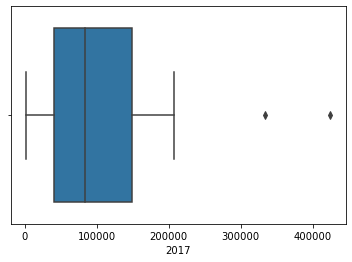

In [204]:
sns.boxplot(wales_df['2017'])

In [465]:
wales_df > (Q3 + 1.5 * IQR)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Industry
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,True,False
11,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False


In [467]:
wales_df < (Q1 - 1.5 * IQR)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Industry
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False


This indicates that there are a few outliers in some of the column. So we need to replace them with mean values.

In [474]:
wales_df[wales_df > (Q3 + 1.5 * IQR)]

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,Industry
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,347600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replacing all the outliers with average of the respective column.

In [481]:
wales_df['2017'][18]= np.mean(wales_df['2017'])
wales_df['2016'][18]= np.mean(wales_df['2016'])
wales_df['2015'][18]= np.mean(wales_df['2015'])
wales_df['2014'][18]= np.mean(wales_df['2014'])
wales_df['2013'][18]= np.mean(wales_df['2013'])
wales_df['2012'][18]= np.mean(wales_df['2012'])
wales_df['2011'][18]= np.mean(wales_df['2011'])
wales_df['2010'][18]= np.mean(wales_df['2010'])
wales_df['2009'][18]= np.mean(wales_df['2009'])

wales_df['2018'][10]= np.mean(wales_df['2018'])


wales_df['2017'][23]= np.mean(wales_df['2017'])
wales_df['2016'][23]= np.mean(wales_df['2016'])
wales_df['2015'][23]= np.mean(wales_df['2015'])
wales_df['2014'][23]= np.mean(wales_df['2014'])
wales_df['2013'][23]= np.mean(wales_df['2013'])
wales_df['2012'][23]= np.mean(wales_df['2012'])
wales_df['2011'][23]= np.mean(wales_df['2011'])
wales_df['2010'][23]= np.mean(wales_df['2010'])
wales_df['2009'][23]= np.mean(wales_df['2009'])

### Task-1.3: Changing the Industry names

In [206]:
wales_df['Industry'].value_counts()

Production                                                                                           5
Public administration, defence, education and health                                                 4
Wholesale, retail, transport, hotels and food                                                        4
Other service activities                                                                             3
Professional, scientific and technical activities; administrative and support service activities     3
Agriculture, forestry and fishing                                                                    1
Construction                                                                                         1
Information and communication                                                                        1
Finance and insurance activities                                                                     1
Real estate activities                                                   

In [246]:
wales_df['Industry'].replace('Agriculture, forestry and fishing ', 'Agriculture', inplace= True)
wales_df['Industry'].replace('Wholesale, retail, transport, hotels and food ', 'Retail', inplace= True)
wales_df['Industry'].replace('Public administration, defence, education and health ', 'Public_Adminstration', inplace= True)
wales_df['Industry'].replace('Other service activities ', 'Other_Service ', inplace= True)
wales_df['Industry'].replace('Professional, scientific and technical activities; administrative and support service activities ', 'Professional_Service', inplace= True)
wales_df['Industry'].replace('Information and communication ', 'ICT', inplace= True)
wales_df['Industry'].replace('Finance and insurance activities ', 'Finance', inplace= True)
wales_df['Industry'].replace('Real estate activities ', 'Real_Estate', inplace= True)

In [247]:
wales_df['Industry']

3              Agriculture
4              Production 
5              Production 
6              Production 
7              Production 
8              Production 
9            Construction 
10                  Retail
11                  Retail
12                  Retail
13                  Retail
14                     ICT
15                 Finance
16             Real_Estate
17    Professional_Service
18    Professional_Service
19    Professional_Service
20    Public_Adminstration
21    Public_Adminstration
22    Public_Adminstration
23    Public_Adminstration
24          Other_Service 
25          Other_Service 
26          Other_Service 
Name: Industry, dtype: object

In [226]:
wales_df=wales_df.drop('category', axis=1)

## 2. Data Analysis

#### 2.1: Which industry employed the highest and lowest workers over the period?

In [248]:
industries = wales_df.groupby('Industry')

In [249]:
industries.head()

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,Industry
3,40200,41100,36100,40700,36800,42700,43200,36100,37700,38200,Agriculture
4,90800,165700,90000,92600,89300,97000,102700,91300,96600,93200,Production
5,32100,2000,33200,30800,32400,32400,31000,31100,33800,29800,Production
6,58900,143600,26400,24000,26900,35700,34400,27200,27800,27900,Production
7,83200,7800,72400,77200,75500,73300,72400,72800,64200,68000,Production
8,43100,12400,36400,44400,41000,38600,41100,40400,34200,36600,Production
9,40200,101800,35900,32800,34500,34700,31300,32400,30000,31400,Construction
10,165100,347600,158600,172300,164200,173300,162500,154400,156700,149800,Retail
11,1900,190600,2500,1800,2100,2000,2400,2200,1800,1900,Retail
12,143100,50600,138100,147200,142700,153200,141800,132300,139500,131900,Retail


In [250]:
employees = industries.sum()

In [251]:
employees['period_total'] = employees['2009']+employees['2010']+employees['2011']+employees['2012']+employees['2013']+employees['2014']+employees['2015']+employees['2016']+employees['2017']+employees['2018']

<AxesSubplot:xlabel='Industry'>

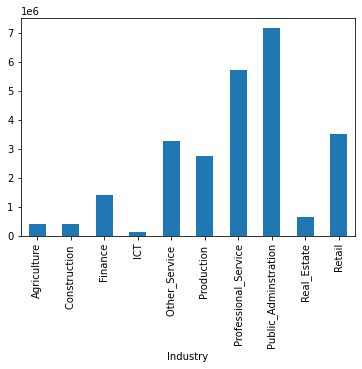

In [252]:
employees['period_total'].plot(kind= 'bar')

In [253]:
employees[employees['period_total']== employees['period_total'].max()]

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,period_total
Industry,,,,,,,,,,,
Public_Adminstration,690100,869800,697700,714400,700500,700500,718200,699000,681700,684600,7156500


In [254]:
employees[employees['period_total']== employees['period_total'].min()] 

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010,period_total
Industry,,,,,,,,,,,
ICT,12500,31500,10200,12900,12200,10600,10400,12700,8900,9600,131500


The above analysis gives the industry that the maximum and minimum number of employees throughout 2009-2018. The 'period_total' columns give the total employees of that particular industry in the period. 
From that column, the maximum employees in the 'Public_Administration' industry and the minimum number of employees in the 'ICT(Information and Technology)' industry. The same insight is on the graph as well.

#### 2.2: Which industry has the highest and lowest overall growth over the period?

Industry
Agriculture             AxesSubplot(0.125,0.125;0.775x0.755)
Construction            AxesSubplot(0.125,0.125;0.775x0.755)
Finance                 AxesSubplot(0.125,0.125;0.775x0.755)
ICT                     AxesSubplot(0.125,0.125;0.775x0.755)
Other_Service           AxesSubplot(0.125,0.125;0.775x0.755)
Production              AxesSubplot(0.125,0.125;0.775x0.755)
Professional_Service    AxesSubplot(0.125,0.125;0.775x0.755)
Public_Adminstration    AxesSubplot(0.125,0.125;0.775x0.755)
Real_Estate             AxesSubplot(0.125,0.125;0.775x0.755)
Retail                  AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

<Figure size 1152x864 with 0 Axes>

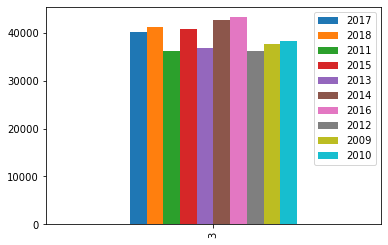

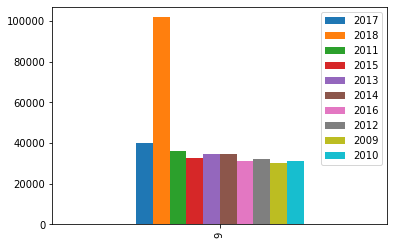

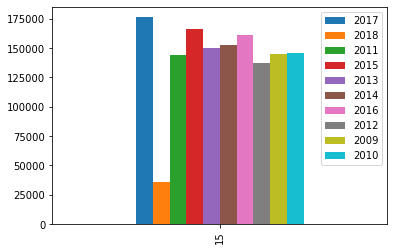

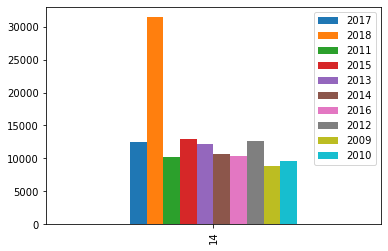

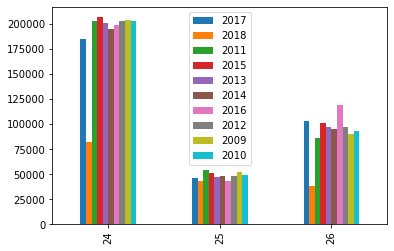

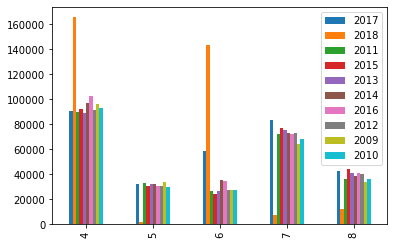

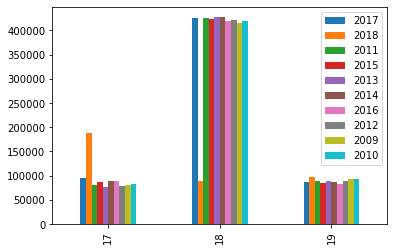

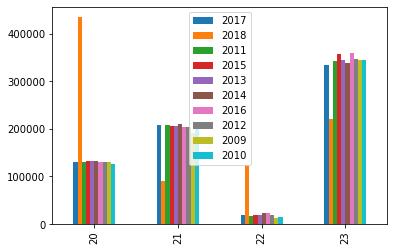

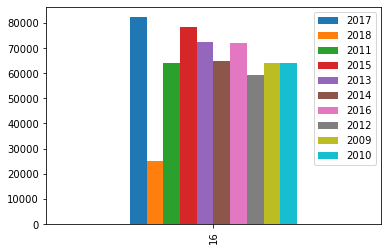

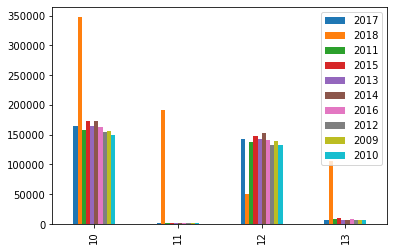

In [262]:
plt.figure(figsize=(16,12))
industries.plot(kind='bar')

In [447]:
# agri = wales_df[wales_df['Industry']=='Agriculture']
avgInd = []
sect =[]
for sec in wales_df['Industry']:
    mn= np.mean(wales_df[wales_df['Industry']==sec])
    sect.append(sec)
    avgInd.append(np.mean(mn))
    

In [455]:
sc = pd.DataFrame(sect,  columns= ['sector'])
av = pd.DataFrame(avgInd,  columns= ['average'])

In [457]:
mns= pd.concat([sc, av], axis=1)

In [458]:
mns.head()

,sector,average
0,Agriculture,39280.0
1,Production,55312.0
2,Production,55312.0
3,Production,55312.0
4,Production,55312.0


In [460]:
mns[mns['average']== mns['average'].max()]


,sector,average
14,Professional_Service,190890.0
15,Professional_Service,190890.0
16,Professional_Service,190890.0


In [461]:
mns[mns['average']== mns['average'].min()]

,sector,average
11,ICT,13150.0


From the above plots, it is clear that the maximum average growth throughout the period 2009-2018 is in the Professional_Service industry in Wales. The minimum growth sector is the ICT(Information and Technology)with average employment of 13150 over this 10 years period.

#### Which years are the best and worst performing year in relation to number of employment. (highest and lowest employment) 


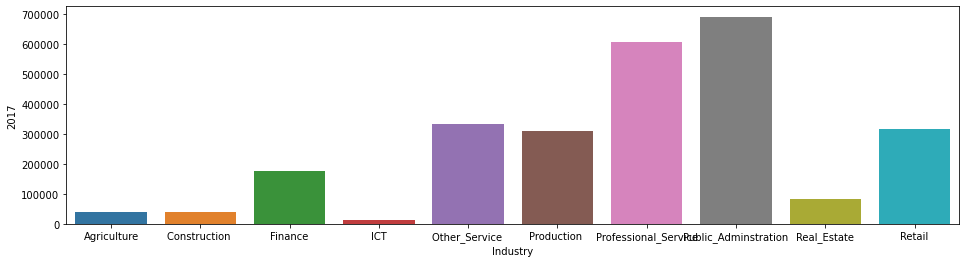

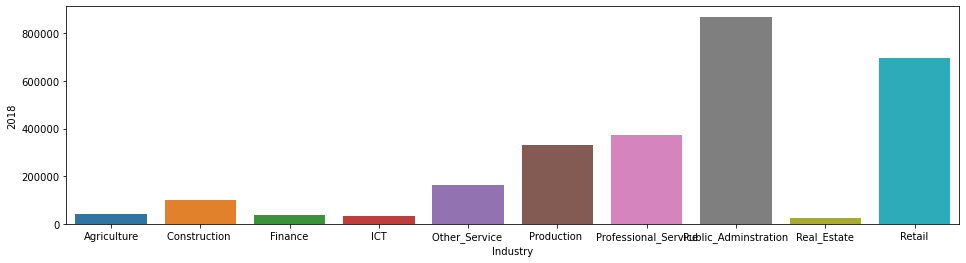

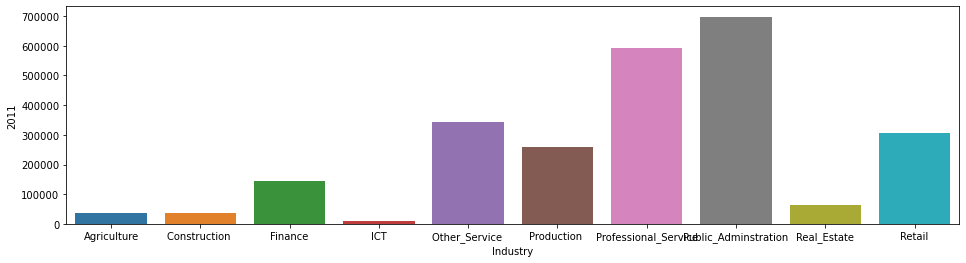

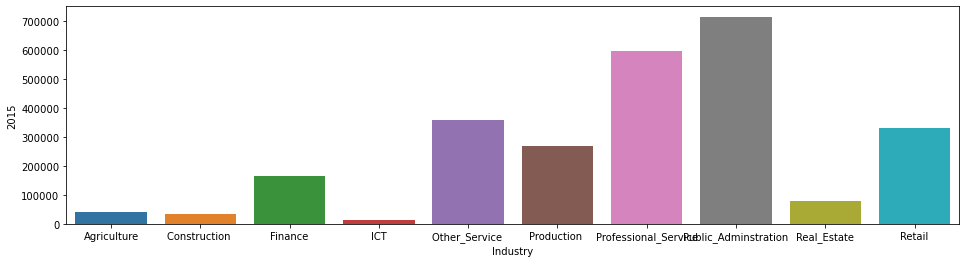

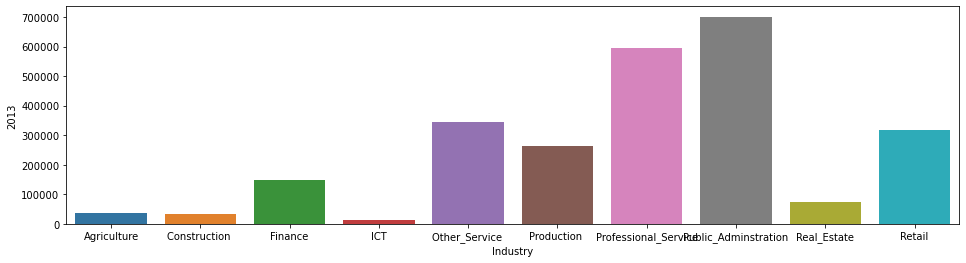

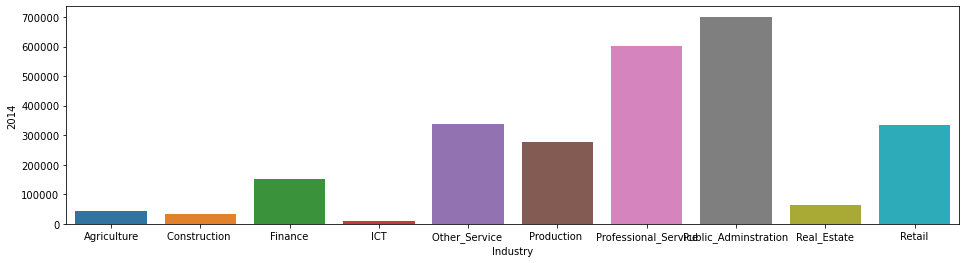

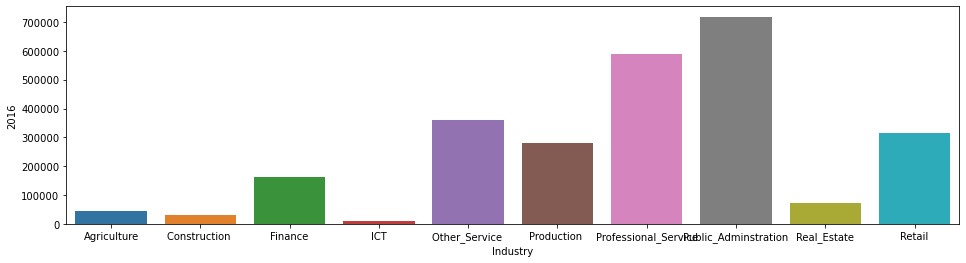

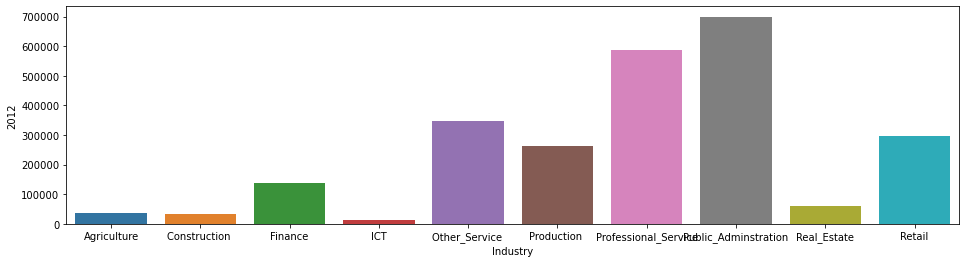

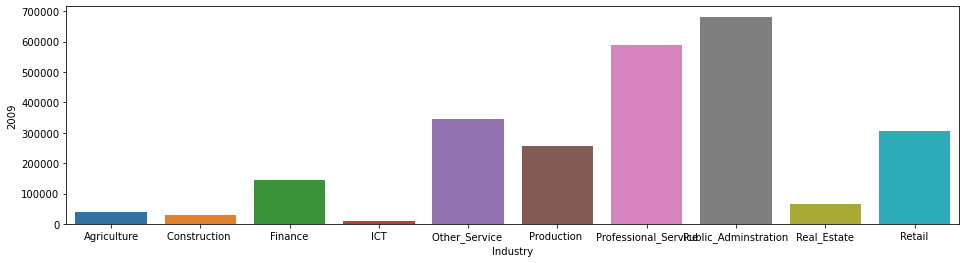

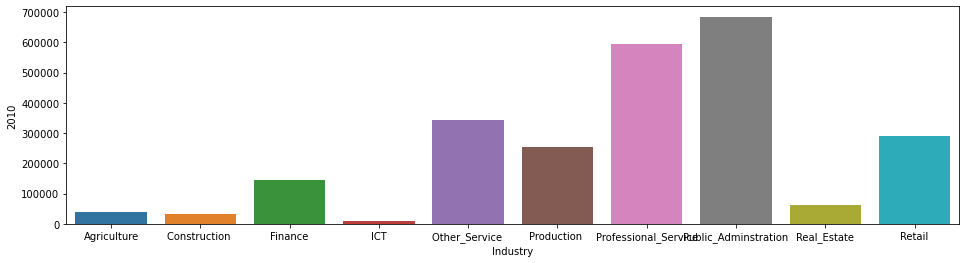

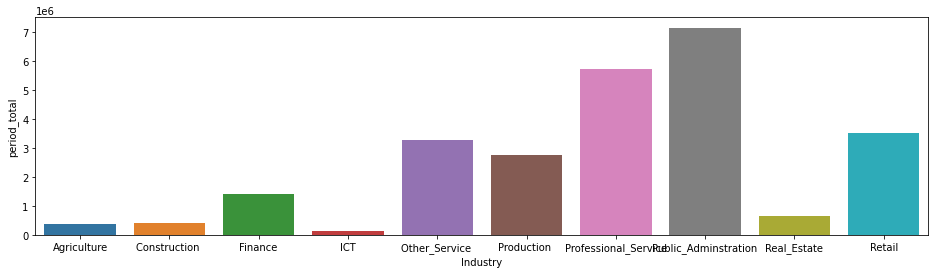

In [293]:
import warnings
warnings.filterwarnings('ignore')
for col in employees.columns:
    plt.figure(figsize=(16,4))
    
    sns.barplot(employees.index, employees[col])

In [275]:
employees.index

Index(['Agriculture', 'Construction ', 'Finance', 'ICT', 'Other_Service ',
       'Production ', 'Professional_Service', 'Public_Adminstration',
       'Real_Estate', 'Retail'],
      dtype='object', name='Industry')

<AxesSubplot:xlabel='Industry', ylabel='2017'>

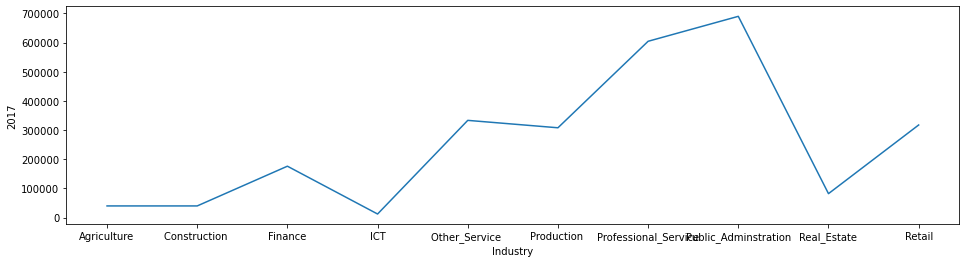

In [292]:
plt.figure(figsize=(16,4))
sns.lineplot(employees.index, employees['2017'])

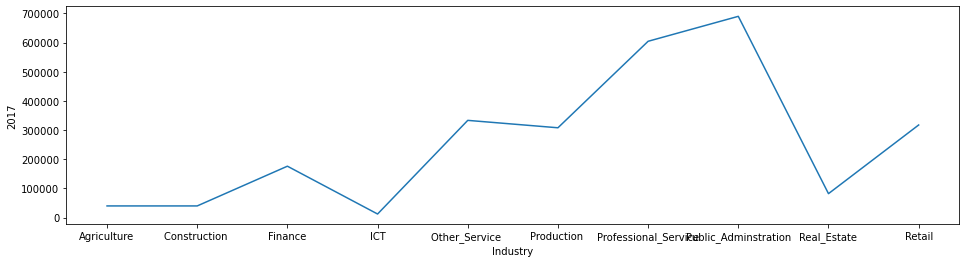

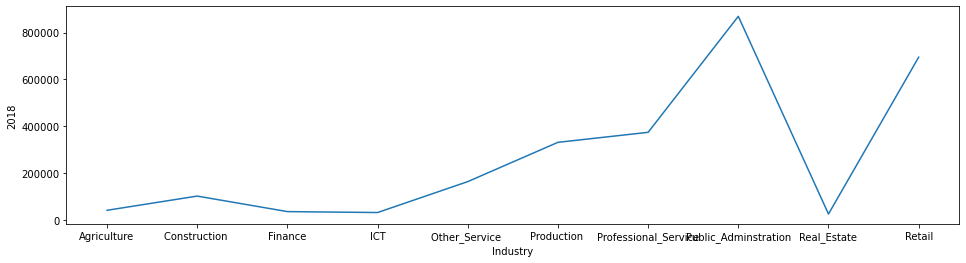

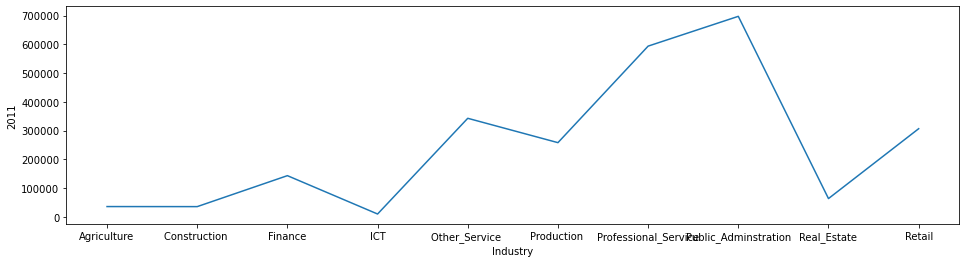

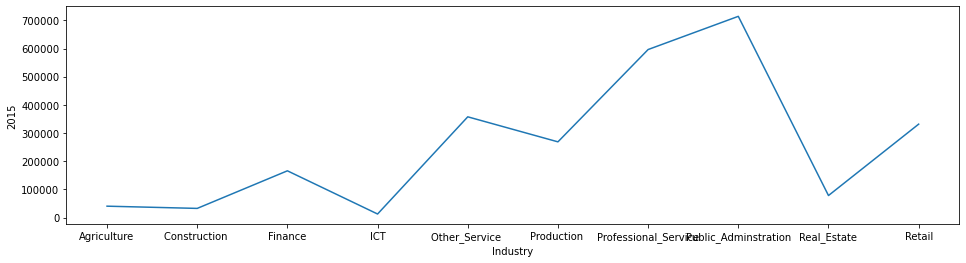

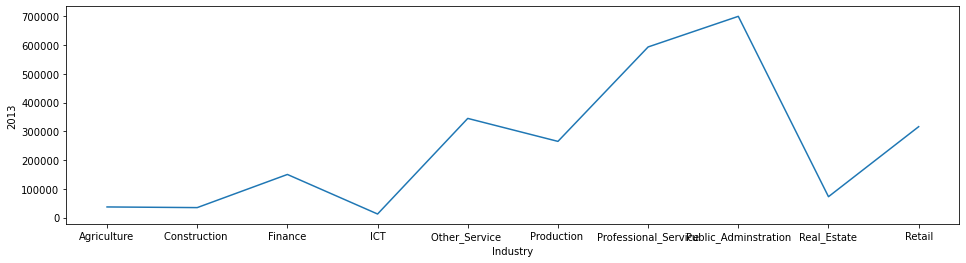

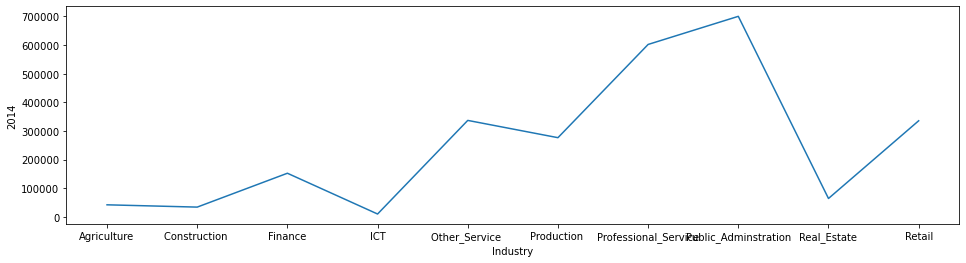

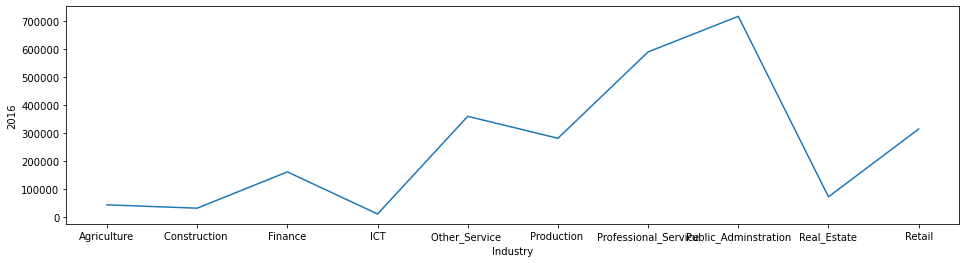

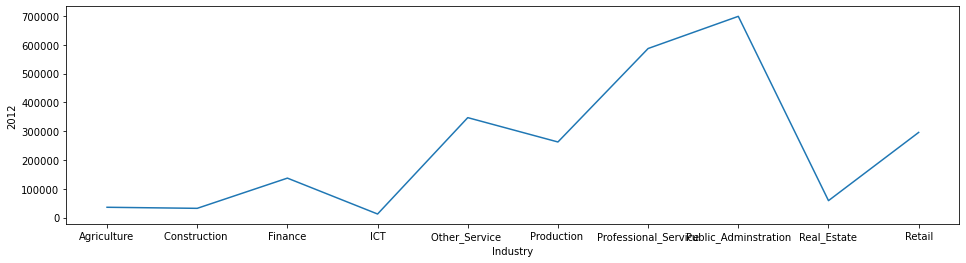

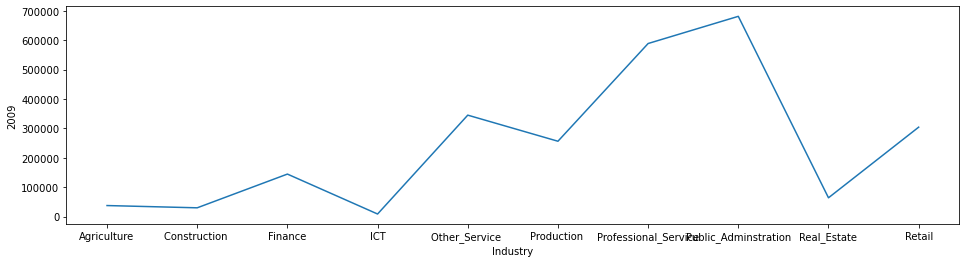

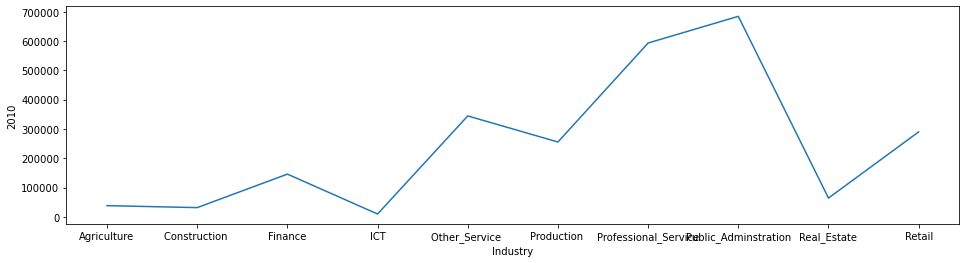

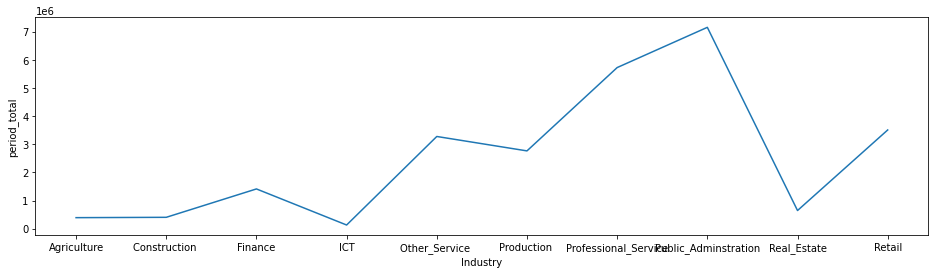

In [291]:
import warnings
warnings.filterwarnings('ignore')
for col in employees.columns:
    plt.figure(figsize=(16,4))
    
    sns.lineplot(employees.index, employees[col])

In [362]:
means = [np.mean(employees['2018']), np.mean(employees['2017']), np.mean(employees['2016']), np.mean(employees['2015']), np.mean(employees['2014']), np.mean(employees['2013']), np.mean(employees['2012']),np.mean(employees['2011']),np.mean(employees['2010']),np.mean(employees['2009'])]  ##np.mean(employees['2017']),np.mean(employees['2017']),np.mean(employees['2017']),np.mean(employees['2017']),np.mean(employees['2017'])

In [372]:
avg = pd.DataFrame(means, columns= ['AvgYearWise'], index= ['2018','2017','2016','2015','2014','2013','2012','2011','2010', '2009'])

In [436]:
avg.head()

,AvgYearWise
2018,266940.0
2017,260560.0
2016,258370.0
2015,260070.0
2014,255890.0


<AxesSubplot:>

<Figure size 1152x720 with 0 Axes>

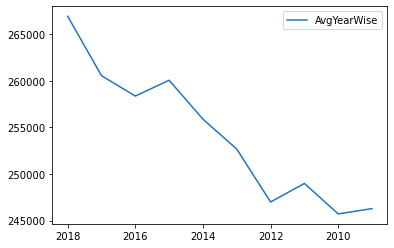

In [376]:
plt.figure(figsize=(16,10))
avg.plot()

In [380]:
avg[avg['AvgYearWise']== avg['AvgYearWise'].min()]

,AvgYearWise
2010,245720.0


In [381]:
avg[avg['AvgYearWise']== avg['AvgYearWise'].max()]

,AvgYearWise
2018,266940.0


The above analytics illustrates the year wise growth of each industry. The criteria for evaluating the growth is taken as the average value of all the employees within a particular year for all industries. The maximum growth has been seen in the year 2018 and the minimum growth is in 2010. 

### 3. Visual analysis

#### Create a dynamic scatter/bubble plot showing the change of workforce number over the period using Plotly express.

In [484]:
import plotly.express as px
fig = px.scatter(x=employees.index, y= employees['period_total'])
fig.show()

### 4. PCA/Correlation 

#### 4.1 Undertake a PCA (PC=2; columns should be like PC1, PC2, Industry) and produce a scatter plot. 

Write your interpretation about the plot and in relation to the analysis of section 2 & 3 (for example which industries are correlated over the years as well as in PCA etc.)


In [298]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [308]:
X = wales_df.drop('Industry', axis=1)

In [328]:
#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2']) 
principalDf.head()


,PC1,PC2
0,-203867.326389,-53596.789197
1,-30314.810396,57277.511639
2,-228699.900791,-90786.982918
3,-216519.209535,50037.135782
4,-104524.385552,-95325.161493


In [329]:
finalDf= pd.concat([principalDf, wales_df['Industry']], axis=1)
finalDf.head()

,PC1,PC2,Industry
0,-203867.326389,-53596.789197,NaN
1,-30314.810396,57277.511639,NaN
2,-228699.900791,-90786.982918,NaN
3,-216519.209535,50037.135782,Agriculture
4,-104524.385552,-95325.161493,Production


In [330]:
finalDf = finalDf.dropna()

In [331]:
finalDf.head()

,PC1,PC2,Industry
3,-216519.209535,50037.135782,Agriculture
4,-104524.385552,-95325.161493,Production
5,-204831.872420,-82417.019364,Production
6,-215076.570414,8106.200954,Production
7,188361.598578,221811.623299,Production


In [334]:
finalDf['Industry'].value_counts()

Production              5
Public_Adminstration    4
Retail                  4
Professional_Service    3
ICT                     1
Finance                 1
Construction            1
Agriculture             1
Real_Estate             1
Name: Industry, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

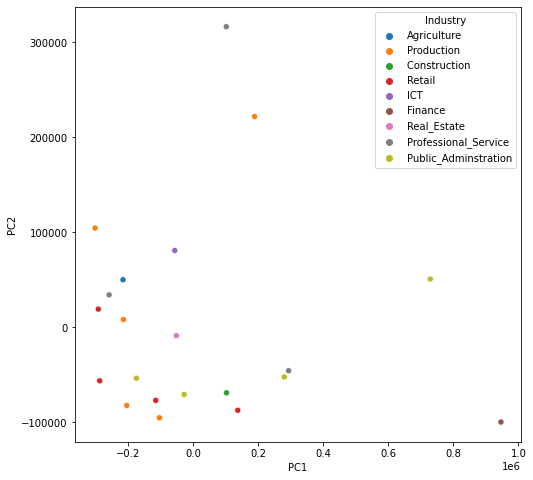

In [338]:
fig=plt.figure(figsize=(8,8))  

sns.scatterplot(finalDf['PC1'], finalDf['PC2'], hue= finalDf['Industry'] )

The above scatterplot shows the correlation among industries. It is clear that Public_Administration and Professional_Service are highly correlated with each other. Following this we can identify the other correlated industries as well.

#### 4.2 Make a year wise correlation for each industry.  Does the aforementioned industries are also correlated over the years? Explain your answer. 

In [349]:
pd.unique(wales_df['Industry'])

array(['Agriculture', 'Production ', 'Construction ', 'Retail', 'ICT',
       'Finance', 'Real_Estate', 'Professional_Service',
       'Public_Adminstration', 'Other_Service '], dtype=object)

In [432]:
corrmat = wales_df.corr()
corrmat

,2017,2018,2011,2015,2013,2014,2016,2012,2009,2010
2017,1.000000,0.204724,0.993983,0.995473,0.995549,0.996349,0.995262,0.992969,0.993215,0.994180
2018,0.204724,1.000000,0.213838,0.213198,0.211847,0.224173,0.216135,0.215582,0.223381,0.208619
2011,0.993983,0.213838,1.000000,0.997824,0.999334,0.998367,0.995912,0.999331,0.998986,0.999302
2015,0.995473,0.213198,0.997824,1.000000,0.998938,0.997795,0.998157,0.997489,0.998028,0.997995
2013,0.995549,0.211847,0.999334,0.998938,1.000000,0.998698,0.997421,0.999077,0.998776,0.999012
2014,0.996349,0.224173,0.998367,0.997795,0.998698,1.000000,0.996699,0.997474,0.997722,0.997541
2016,0.995262,0.216135,0.995912,0.998157,0.997421,0.996699,1.000000,0.997117,0.996997,0.997411
2012,0.992969,0.215582,0.999331,0.997489,0.999077,0.997474,0.997117,1.000000,0.998854,0.999449
2009,0.993215,0.223381,0.998986,0.998028,0.998776,0.997722,0.996997,0.998854,1.000000,0.999451
2010,0.994180,0.208619,0.999302,0.997995,0.999012,0.997541,0.997411,0.999449,0.999451,1.000000


<AxesSubplot:>

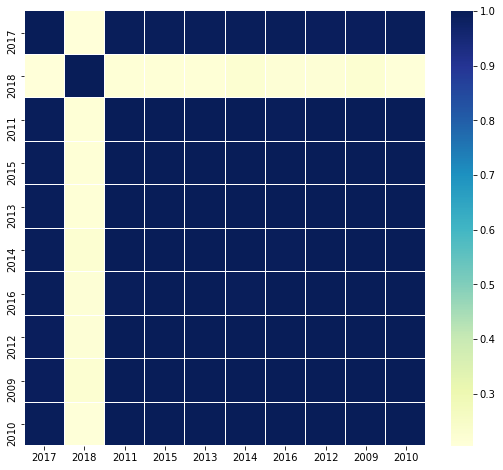

In [353]:

f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)


It is clear from the correlation matrix and the heatmap that the employeement in the industries over the period is highly correlated with each other.

### 5. Clustering (k means & hierarchical)
#### 5.1 Using the best and worst performing year column’s employment data (2.3) undertake a K means clustering analysis (K=2 & 3) and identify industries cluster together.

In [400]:
X= pd.concat([wales_df['2018'], wales_df['2010']], axis =1)

In [401]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2) # You want cluster =2
kmeans.fit(X)

KMeans(n_clusters=2)

In [402]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int32)

<AxesSubplot:xlabel='2010', ylabel='2018'>

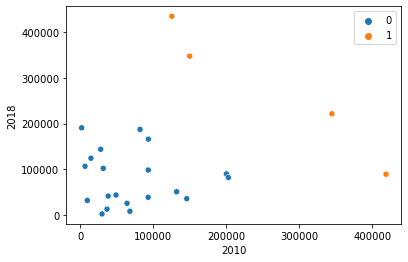

In [403]:
sns.scatterplot(X['2010'],X['2018'], hue= kmeans.labels_)

<AxesSubplot:xlabel='2010', ylabel='2018'>

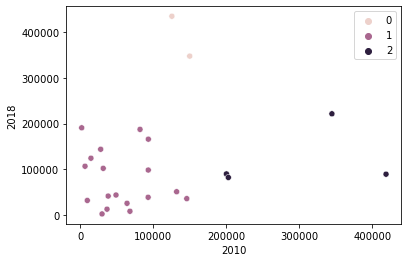

In [404]:

kmeans_ = KMeans(n_clusters=3) # You want cluster =3
kmeans_.fit(X)
sns.scatterplot(X['2010'],X['2018'], hue= kmeans_.labels_)

The best performing year is 2018 and the worst-performing year is 2010. Hence, they are chosen for the cluster analysis. The Kmeans clustering is an unsupervised ML algorithm that predicts the label using the Euclidean distance concept (sklearn.cluster.KMeans — scikit-learn 0.24.2 documentation, 2021). 


For k=2: When the number of clusters is 2 i.e. we have 2 labels. Hence, we will get two clusters one for each label. The scatter plot shows the two clusters for labels 0 and 1. The algorithm can distinguish the clusters effectively.

For K = 3: If the number of clusters is 3 then there 3 clusters will be formed. The plot is showing the three clusters for 0,1, and 2. It is also able to give good predictions only the distance here between 1 and 2 labels is less while with 0 is more. This indicates that 3 is not an appropriate cluster for this data.

In [412]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)


In [413]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1])

<AxesSubplot:xlabel='2010', ylabel='2018'>

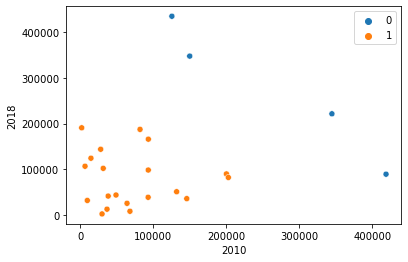

In [414]:
sns.scatterplot(X['2010'], X['2018'], hue = clustering.labels_)

<AxesSubplot:xlabel='2010', ylabel='2018'>

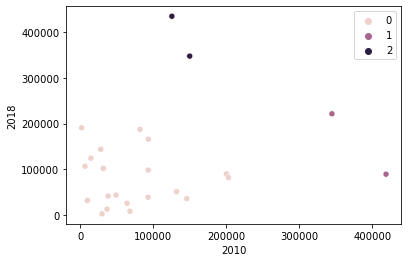

In [416]:
clustering2 = AgglomerativeClustering(n_clusters=3).fit(X)
clustering2.labels_
sns.scatterplot(X['2010'], X['2018'], hue = clustering2.labels_)

In Hiererichal Clustering, for number of clusters = 2 the plot is contrary of the k-means clustering. While for 3 clusters,HIererichal Clustering is giving the more accurate result by seperating the 1 and 2 more further (sklearn.cluster.AgglomerativeClustering — scikit-learn 0.24.2 documentation, 2021).

## Discusssion:

Wales has various employment opportunities among different industries and departments. The most growing industry in Wales throughout the period is Professional_Service and the IT industry is the least growing industry in this period. The maximum employment happened in the Public_Administion sector and the IT sector has the least number of employees during 2009-2018 in Wales.
The year 2018 shows the maximum growth in employment i.e. in 2018 the highest number of employees were hired. But in 2010, the employment number is the lowest throughout the years for all the industries working in Wales.
The scatterplot for employment workforce over the period in the industries varies from less than 1million to more than 7million. This indicates that every industry has distinct employment criteria and the number of employees. 
The PCA is a dimensionality reduction technique that converts the high dimensional data into a low dimensional feature set. In this case, it is converting the whole data into 2 dimensions. Then using these features the scatterplot yields the relation among industries. The correlation matrix and the scatterplot yields similar results for the correlation of industries. 
To verify this, a heatmap is plotted that signifies the correlation between two industries by plotting them on the map. The correlation is shown by values between 0 and 1. The one holding the highest correlation and 0 with no correlation at all. 
Clustering is an unsupervised method to classify the data points by distributing them into clusters. Kmeans clustering uses the Euclidean distance to distribute the data points among clusters while Hiererichal clustering uses noise and core circle method to determine the cluster for the data point. 
The clustering plots are nicely classifying the data points but we can not significantly compare which clustering algorithm works better unless we use techniques to decide the number of clusters such as knee locater and Silhouette.



### References:
Scikit-learn.org. 2021. sklearn.cluster.KMeans — scikit-learn 0.24.2 documentation. [online] Available at: <http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html> [Accessed 9 June 2021].

Scikit-learn.org. 2021. sklearn.cluster.AgglomerativeClustering — scikit-learn 0.24.2 documentation. [online] Available at: <http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html> [Accessed 9 June 2021].